#  Merging

Better do it weekly to align dates

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#covid
df_covid = pd.read_csv('silver/covid_data.csv')
df_covid.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [26]:
df_covid.country.unique()

array(['Brazil', 'Chile', 'Colombia', 'Dominican Republic', 'Germany',
       'Italy', 'Mexico', 'Panama', 'US', 'Uruguay'], dtype=object)

In [27]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date_str'] = df_covid['date'].astype(str)

In [28]:
# Convert date column to datetime if not already
df_covid['date'] = pd.to_datetime(df_covid['date'])

# Get the start of the week (Monday) as a datetime object
df_covid['week'] = df_covid['date'].dt.to_period('W').apply(lambda x: x.start_time)

# Group by week and country
df_covid_weekly = df_covid.groupby(['week', 'country']).agg({'new_cases': 'sum', 'cases': 'sum'}).reset_index()

# Rename 'week' column to 'date' (keeping it as datetime)
df_covid_weekly.rename(columns={'week': 'date'}, inplace=True)


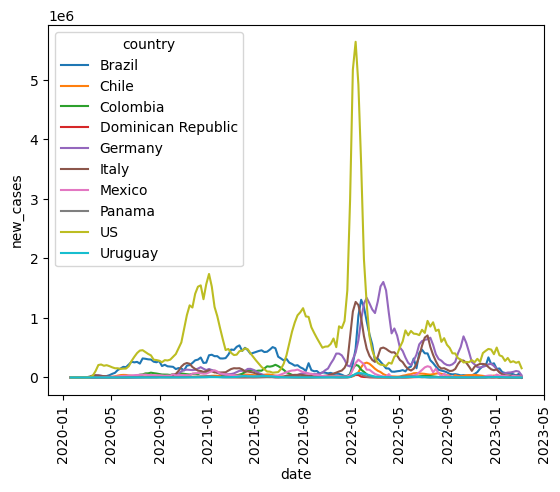

In [29]:
sns.lineplot(data = df_covid_weekly, x = 'date', y = 'new_cases', hue = 'country')
plt.xticks(rotation = 90)
plt.show()

In [99]:
# load stringency index
df_stringency = pd.read_csv('silver/covid_policy_tracker.csv')
df_stringency.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [100]:
df_stringency = df_stringency[['Date','CountryName', 'StringencyIndex_Average']]
df_stringency['date'] = pd.to_datetime(df_stringency['Date'], format='%Y%m%d')
df_stringency['week'] = df_stringency['date'].dt.to_period('W').apply(lambda x: x.start_time)
df_stringency_weekly = df_stringency.groupby(['week', 'CountryName']).agg({'StringencyIndex_Average': 'mean'}).reset_index()
df_stringency_weekly.rename(columns={'CountryName': 'country', 'week':'date'}, inplace=True)

In [101]:
df_stringency_weekly.head()

,date,country,StringencyIndex_Average
0,2019-12-30,Afghanistan,0.0
1,2019-12-30,Albania,0.0
2,2019-12-30,Algeria,0.0
3,2019-12-30,Andorra,0.0
4,2019-12-30,Angola,0.0


In [103]:
df_stringency_weekly['country'].replace({'United States': 'US'}, inplace=True)

In [ ]:
# load atmosferic data
df_atmos = pd.read_csv('silver/atmosferic_data.csv')
df_atmos.head()

,Date,Country,Specie,median
0,2022-03-28,BR,co,2.266667
1,2022-03-28,BR,dew,20.000000
2,2022-03-28,BR,humidity,81.000000
3,2022-03-28,BR,no2,6.066667
4,2022-03-28,BR,o3,15.866667


In [31]:
df_atmos['date'] = pd.to_datetime(df_atmos['Date'])
df_atmos['date_str'] = df_atmos['date'].astype(str)

In [32]:
dict_countries_2 = {'BR':'Brazil','CL':'Chile', 'CO':'Colombia', 'IT':'Italy',
                  'MX':'Mexico', 'PA':'Panama', 'US':'US', 'DE': 'Germany',
                    'GR':'Greece', 'TR':'Turkey'}

In [33]:
# new countries atmospheric
new_countries = []
for i in range(len(df_atmos)):
    new_country = dict_countries_2[df_atmos['Country'][i]]
    new_countries.append(new_country)

df_atmos['country'] = new_countries

In [34]:
df_atmos

,Date,Country,Specie,median,date,date_str,country
0,2022-03-28,BR,co,2.266667,2022-03-28,2022-03-28,Brazil
1,2022-03-28,BR,dew,20.000000,2022-03-28,2022-03-28,Brazil
2,2022-03-28,BR,humidity,81.000000,2022-03-28,2022-03-28,Brazil
3,2022-03-28,BR,no2,6.066667,2022-03-28,2022-03-28,Brazil
4,2022-03-28,BR,o3,15.866667,2022-03-28,2022-03-28,Brazil
...,...,...,...,...,...,...,...
236682,2023-12-31,TR,pressure,992.570588,2023-12-31,2023-12-31,Turkey
236683,2023-12-31,TR,so2,6.747059,2023-12-31,2023-12-31,Turkey
236684,2023-12-31,TR,temperature,7.311765,2023-12-31,2023-12-31,Turkey
236685,2023-12-31,TR,wind-gust,6.600000,2023-12-31,2023-12-31,Turkey


In [35]:
df_atmos_wide = pd.pivot_table(df_atmos, index=['date_str', 'country'], columns = ['Specie'], values = 'median').reset_index()
df_atmos_wide.head()

Specie,date_str,country,co,d,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,uvi,wd,wind gust,wind speed,wind-gust,wind-speed
0,2014-12-29,Brazil,5.50,NaN,NaN,NaN,12.400000,19.700000,20.500000,50.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,Chile,7.22,NaN,NaN,NaN,6.200000,15.600000,25.400000,34.636364,NaN,NaN,2.825000,NaN,4.3,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,Colombia,5.10,NaN,NaN,NaN,6.500000,4.200000,29.000000,50.000000,NaN,NaN,0.800000,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,Germany,1.15,NaN,NaN,NaN,14.553333,9.453846,17.933333,44.500000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,Italy,0.10,NaN,NaN,NaN,32.583333,12.433333,18.571429,72.250000,NaN,NaN,2.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# see nans by column for df_atmos_wide
df_atmos_wide.isnull().sum()

Specie
date_str             0
country              0
co                 424
d                20569
dew               6197
humidity          5586
no2                 89
o3                  80
pm10                56
pm25               213
precipitation    16293
pressure          5593
so2                 98
temperature       5584
uvi              19919
wd               16971
wind gust        19849
wind speed       19828
wind-gust         7254
wind-speed        6388
dtype: int64

In [37]:
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date_str'])

In [38]:
# filter for 2020 onwards
df_atmos_wide_2020 = df_atmos_wide[df_atmos_wide['date_str'] >= '2020-01-01']

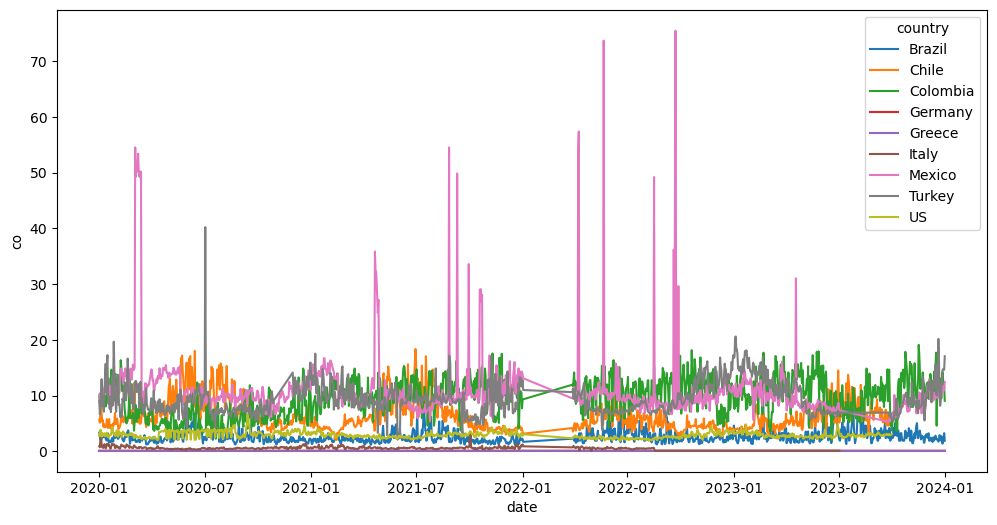

In [39]:
# plot co, no2, o3, pm10, pm25, so2
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='co', hue='country')
plt.show()

In [40]:
df_atmos_wide.columns

Index(['date_str', 'country', 'co', 'd', 'dew', 'humidity', 'no2', 'o3',
       'pm10', 'pm25', 'precipitation', 'pressure', 'so2', 'temperature',
       'uvi', 'wd', 'wind gust', 'wind speed', 'wind-gust', 'wind-speed',
       'date'],
      dtype='object', name='Specie')

In [41]:

# Ensure 'date' is in datetime format
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date'])

# Sort by country and date for proper interpolation
df_atmos_wide = df_atmos_wide.sort_values(by=['country', 'date'])

# List of pollutant columns to process
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country using linear interpolation
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.interpolate(method='linear'))

# Fill remaining NaNs using forward-fill then backward-fill within each country
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if any NaNs remain
print("Remaining NaNs:\n", df_atmos_wide[pollutants].isna().sum())

# Create a 'week' column representing the start of the week (Monday)
df_atmos_wide['week'] = df_atmos_wide['date'].dt.to_period('W').apply(lambda x: x.start_time)

# Group by 'week' and 'country' and aggregate only pollutants (mean)
df_atmos_wide_w = df_atmos_wide.groupby(['week', 'country'])[pollutants].mean().reset_index()

# Rename 'week' column to 'date' (keeping it as datetime)
df_atmos_wide_w.rename(columns={'week': 'date'}, inplace=True)

# Display result
df_atmos_wide_w.head()


C:\Users\danie\AppData\Local\Temp\ipykernel_18260\1340473643.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\danie\AppData\Local\Temp\ipykernel_18260\1340473643.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


Remaining NaNs:
 Specie
co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


Specie,date,country,co,no2,o3,pm10,pm25,so2
0,2014-12-29,Brazil,4.728571,8.121429,19.042857,15.000000,38.285714,1.100000
1,2014-12-29,Chile,7.282857,6.842857,14.666667,27.275325,38.727273,4.270238
2,2014-12-29,Colombia,4.785714,4.700000,5.628571,25.285714,42.857143,0.571429
3,2014-12-29,Germany,0.867347,12.622857,12.467949,22.666667,53.642857,5.109911
4,2014-12-29,Italy,0.100000,25.773810,12.275000,28.602041,91.182823,1.954762


<Axes: xlabel='date', ylabel='pm25'>

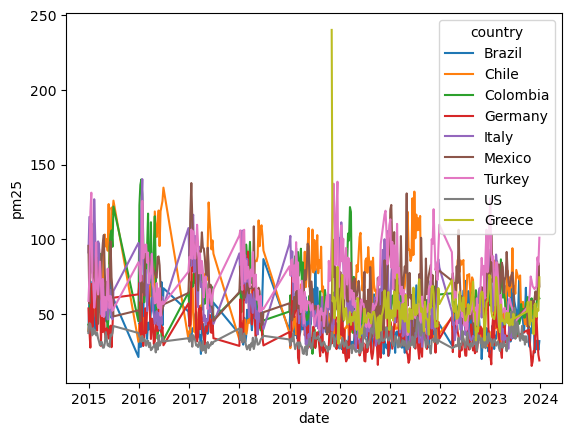

In [43]:
sns.lineplot(data=df_atmos_wide_w, x='date', y='pm25', hue='country')

In [44]:
df_atmos_wide_w.isnull().sum()

Specie
date       0
country    0
co         0
no2        0
o3         0
pm10       0
pm25       0
so2        0
dtype: int64

In [79]:
df_mobility = pd.read_csv('silver/mobility_index.csv')
df_mobility.head()

,Date,Mean_distance_avg_14day_movavg,country
0,2020-03-24,22.78,CHL
1,2020-03-25,21.42,CHL
2,2020-03-26,20.28,CHL
3,2020-03-27,18.77,CHL
4,2020-03-28,17.41,CHL


In [80]:
mobility_country_dict = {'CHL':'Chile', 'COL':'Colombia',
                          'GRC':'Greece', 'ITA':'Italy',
                            'MEX':'Mexico', 'PAN':'Panama',
                              'TUR':'Tureky', 'USA':'US',
                                'BRA':'Brazil', 'DEU':'Germany'}

In [81]:
# replace countries in df_mobility
new_countries = []
for i in range(len(df_mobility)):
    new_country = mobility_country_dict[df_mobility['country'][i]]
    new_countries.append(new_country)

In [82]:
df_mobility['country'] = new_countries

In [83]:
# check for nans in df_mobility
df_mobility.isnull().sum()

Date                              0
Mean_distance_avg_14day_movavg    0
country                           0
dtype: int64

In [84]:
print(df_mobility.dtypes)


Date                               object
Mean_distance_avg_14day_movavg    float64
country                            object
dtype: object


In [85]:
# gorup weekly, average
df_mobility['date'] = pd.to_datetime(df_mobility['Date'])
df_mobility['week'] = df_mobility['date'].dt.to_period('W').dt.start_time
df_mobility = df_mobility [['week', 'country', 'Mean_distance_avg_14day_movavg']]
df_mobility_w = df_mobility.groupby(['week', 'country']).mean().reset_index()
df_mobility_w.rename(columns={'week': 'date'}, inplace=True)
df_mobility_w.head()



,date,country,Mean_distance_avg_14day_movavg
0,2020-03-23,Chile,19.456667
1,2020-03-23,Colombia,7.531667
2,2020-03-23,Greece,8.406667
3,2020-03-23,Italy,7.921667
4,2020-03-23,Mexico,20.615000


In [49]:
df_population = pd.read_csv('silver/un_population.csv')
df_population.head()

,country,year,population
0,World,2020,7851414621
1,World,2021,7922587963
2,World,2022,7986308820
3,World,2023,8056505564
4,Sub-Saharan Africa,2020,1110090241


In [50]:
df_population['country'] = df_population['country'].str.replace('United States of America', 'US')

# Merge

In [51]:
df_merge0 = df_covid_weekly.merge(df_atmos_wide_w, how ='left', on=['date', 'country'])
df_merge0.head()

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2
0,2020-01-20,Brazil,0,0,2.057143,5.461905,13.395238,13.490476,26.204762,1.452381
1,2020-01-20,Chile,0,0,4.511905,4.730952,14.030952,34.779221,38.677489,4.166667
2,2020-01-20,Colombia,0,0,12.250000,10.550000,3.528571,36.285714,59.571429,0.800000
3,2020-01-20,Dominican Republic,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-20,Germany,0,0,0.100000,17.421429,5.700000,25.084034,64.587302,1.508532


In [52]:
df_merge0.isnull().sum()

date           0
country        0
new_cases      0
cases          0
co           576
no2          576
o3           576
pm10         576
pm25         576
so2          576
dtype: int64

In [53]:
# fill nans in df_merge0 interpolating
# Sort by country and date to ensure proper interpolation
df_merge0 = df_merge0.sort_values(by=['country', 'date'])

# List of pollutant columns to interpolate
pollutant_cols = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country
df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.interpolate(method='linear'))

# Fill any remaining NaNs using forward-fill and backward-fill within each country
df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if any NaNs remain
print(df_merge0[pollutant_cols].isna().sum())

co      492
no2     492
o3      492
pm10    492
pm25    492
so2     492
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_18260\1718340747.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\danie\AppData\Local\Temp\ipykernel_18260\1718340747.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


<Axes: xlabel='date', ylabel='pm10'>

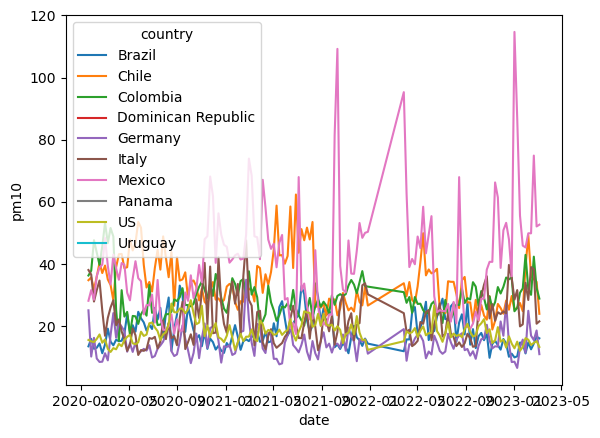

In [54]:
sns.lineplot(data=df_merge0, x='date', y='pm10', hue='country')

In [55]:
nan_counts_by_country = df_merge0.groupby('country').apply(lambda x: x.isna().sum().sum())
print(nan_counts_by_country)

country
Brazil                  0
Chile                   0
Colombia                0
Dominican Republic    984
Germany                 0
Italy                   0
Mexico                  0
Panama                984
US                      0
Uruguay               984
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_18260\942221998.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts_by_country = df_merge0.groupby('country').apply(lambda x: x.isna().sum().sum())


In [56]:
# drop countries where there are more than 10% of nans
countries_to_drop = nan_counts_by_country[nan_counts_by_country > 0.1*len(df_merge0)].index
df_merge0 = df_merge0[~df_merge0['country'].isin(countries_to_drop)]
df_merge0['country'].unique()

array(['Brazil', 'Chile', 'Colombia', 'Germany', 'Italy', 'Mexico', 'US'],
      dtype=object)

In [57]:
df_merge0['year'] = df_merge0['date'].dt.year

In [58]:
df_merge2 = df_merge0.merge(df_population, how ='left', on=['country', 'year'])

In [59]:
df_merge_final = df_merge2.copy()

In [61]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1148 non-null   datetime64[ns]
 1   country     1148 non-null   object        
 2   new_cases   1148 non-null   int64         
 3   cases       1148 non-null   int64         
 4   co          1148 non-null   float64       
 5   no2         1148 non-null   float64       
 6   o3          1148 non-null   float64       
 7   pm10        1148 non-null   float64       
 8   pm25        1148 non-null   float64       
 9   so2         1148 non-null   float64       
 10  year        1148 non-null   int32         
 11  population  1148 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(3), object(1)
memory usage: 103.3+ KB


In [63]:
df_merge_final.drop(columns = ['year'], inplace = True)

In [64]:
import os

# Specify the directory path
directory_path = 'gold'

# Create the directory if it does not exist
os.makedirs(directory_path, exist_ok=True)

df_merge_final.to_csv('gold/covid_multivariate_w.csv', index = False)

## Merge with mobility and restrictions

In [86]:
df_merge_partial = df_merge_final.copy()
df_merge_partial.head()

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2,year,population
0,2020-01-20,Brazil,0,0,2.057143,5.461905,13.395238,13.490476,26.204762,1.452381,2020,208126926
1,2020-01-27,Brazil,0,0,2.642857,6.876190,13.638095,15.890476,31.276190,5.347619,2020,208126926
2,2020-02-03,Brazil,0,0,2.792857,6.109524,11.295238,12.714286,24.942857,3.633333,2020,208126926
3,2020-02-10,Brazil,0,0,2.269048,5.914286,11.766667,13.033333,23.766667,3.257143,2020,208126926
4,2020-02-17,Brazil,0,0,2.852381,6.657143,13.252381,14.419048,29.419048,3.076190,2020,208126926


In [87]:
df_merge_partial2 = df_merge_partial.merge(df_mobility_w, how ='left', on=['date', 'country'])
df_merge_partial2.head()

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2,year,population,Mean_distance_avg_14day_movavg
0,2020-01-20,Brazil,0,0,2.057143,5.461905,13.395238,13.490476,26.204762,1.452381,2020,208126926,NaN
1,2020-01-27,Brazil,0,0,2.642857,6.876190,13.638095,15.890476,31.276190,5.347619,2020,208126926,NaN
2,2020-02-03,Brazil,0,0,2.792857,6.109524,11.295238,12.714286,24.942857,3.633333,2020,208126926,NaN
3,2020-02-10,Brazil,0,0,2.269048,5.914286,11.766667,13.033333,23.766667,3.257143,2020,208126926,NaN
4,2020-02-17,Brazil,0,0,2.852381,6.657143,13.252381,14.419048,29.419048,3.076190,2020,208126926,NaN


In [88]:
df_merge_partial2.isnull().sum()

date                                0
country                             0
new_cases                           0
cases                               0
co                                  0
no2                                 0
o3                                  0
pm10                                0
pm25                                0
so2                                 0
year                                0
population                          0
Mean_distance_avg_14day_movavg    373
dtype: int64

In [90]:
# see number of nans by country
nan_counts_by_country = df_merge_partial2.groupby('country').apply(lambda x: x.isna().sum().sum())
nan_counts_by_country

C:\Users\danie\AppData\Local\Temp\ipykernel_18260\571128465.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts_by_country = df_merge_partial2.groupby('country').apply(lambda x: x.isna().sum().sum())


country
Brazil      164
Chile         9
Colombia      9
Germany     164
Italy         9
Mexico        9
US            9
dtype: int64

In [ ]:
# check where are the nans
df_temp = df_merge_partial2[df_merge_partial2['country']=='Colombia']
df_temp[df_temp['Mean_distance_avg_14day_movavg'].isnull()]

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2,year,population,Mean_distance_avg_14day_movavg
328,2020-01-20,Colombia,0,0,12.250000,10.550000,3.528571,36.285714,59.571429,0.800000,2020,50326931,NaN
329,2020-01-27,Colombia,0,0,12.171429,10.985714,5.942857,37.857143,66.571429,0.757143,2020,50326931,NaN
330,2020-02-03,Colombia,0,0,13.057143,14.214286,7.957143,47.642857,79.357143,1.114286,2020,50326931,NaN
331,2020-02-10,Colombia,0,0,8.850000,12.878571,9.792857,43.642857,75.928571,0.771429,2020,50326931,NaN
332,2020-02-17,Colombia,0,0,7.192857,12.914286,7.900000,39.714286,71.785714,0.814286,2020,50326931,NaN
333,2020-02-24,Colombia,0,0,5.892857,10.550000,9.407143,45.642857,83.142857,0.771429,2020,50326931,NaN
334,2020-03-02,Colombia,1,3,6.592857,11.742857,14.864286,53.285714,103.785714,0.821429,2020,50326931,NaN
335,2020-03-09,Colombia,33,91,7.664286,12.335714,11.400000,46.714286,99.142857,0.742857,2020,50326931,NaN
336,2020-03-16,Colombia,197,927,6.985714,11.328571,17.550000,51.571429,121.500000,0.800000,2020,50326931,NaN


In [104]:
df_merge_partial3 = df_merge_partial2.merge(df_stringency_weekly, how ='left', on=['date', 'country'])
df_merge_partial3.head()

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2,year,population,Mean_distance_avg_14day_movavg,StringencyIndex_Average
0,2020-03-23,Chile,1558,10261,5.828571,5.242857,10.619048,28.350649,37.952381,3.773810,2020,19331414,19.456667,69.844286
1,2020-03-30,Chile,2420,24909,5.978571,6.516667,13.771429,38.922078,50.726190,4.035714,2020,19331414,12.998571,75.930000
2,2020-04-06,Chile,2987,43938,6.235714,6.992857,12.733333,43.142857,66.071429,3.840476,2020,19331414,11.041429,75.930000
3,2020-04-13,Chile,3304,65523,7.383333,8.771429,11.707143,43.233766,69.059524,4.076190,2020,19331414,10.270000,75.930000
4,2020-04-20,Chile,4054,90640,6.742857,6.788095,11.769048,38.662338,63.321429,3.661905,2020,19331414,10.878571,75.930000


The nans are at he begining, will drop all nans and save partial

In [105]:
# drop nans
df_merge_partial3 = df_merge_partial3.dropna()
df_merge_partial3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            725 non-null    datetime64[ns]
 1   country                         725 non-null    object        
 2   new_cases                       725 non-null    int64         
 3   cases                           725 non-null    int64         
 4   co                              725 non-null    float64       
 5   no2                             725 non-null    float64       
 6   o3                              725 non-null    float64       
 7   pm10                            725 non-null    float64       
 8   pm25                            725 non-null    float64       
 9   so2                             725 non-null    float64       
 10  year                            725 non-null    int32         
 11  population 

In [109]:
df_merge_partial3.to_csv('gold/covid_multivariate_w_2.csv', index = False)